
# Análisis de Decretos de Pago - Municipalidad de Monte Quemado
**Objetivo:** Realizar un análisis exploratorio, limpieza y transformación de los datos de decretos de pago de la Secretaría de Obras y Servicios Públicos para identificar ineficiencias y proponer mejoras en el proceso administrativo.

**AlumnoS:**

1. Juan Juarez
2. Carolina Santillan.
3. Mario Acuña.
4. Soledad Landriel.
5. Gabriela Godoy.


# PASO 1: CONFIGURACIÓN DEL ENTORNO Y CARGA DE DATOS

In [1]:
# --- 1.1: Importación de Bibliotecas ---
# Centralizamos todas las herramientas que usaremos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# --- 1.2: Carga de Datos ---# --- .
!pip install gdown -q # Instala gdown silenciosamente
import gdown

url = "https://docs.google.com/spreadsheets/d/1DHQWhj8Bow5cOT5pjqwyNH4ByqbxNBFH/edit?usp=sharing&ouid=103874934688087211684&rtpof=true&sd=true"
output_path = "decretos_obras_publicas.xlsx"
gdown.download(url, output_path, quiet=False, fuzzy=True) # fuzzy=True ayuda con los enlaces de G-Sheets

try:
    df = pd.read_excel(output_path)
    print("✅ ¡Archivo descargado y cargado exitosamente!")
except Exception as e:
    print(f"❌ Error al cargar el archivo descargado: {e}")

Downloading...
From: https://drive.google.com/uc?id=1DHQWhj8Bow5cOT5pjqwyNH4ByqbxNBFH
To: /content/decretos_obras_publicas.xlsx
100%|██████████| 216k/216k [00:00<00:00, 64.6MB/s]


✅ ¡Archivo descargado y cargado exitosamente!


In [3]:
# --- 1.3: Verificación Inicial ---
# Mostramos las primeras filas para confirmar que todo se cargó bien.
print("\n--- Primeras 5 filas del DataFrame: ---")
df.head()


--- Primeras 5 filas del DataFrame: ---


,ORDEN,FECHA,EXPEDIENTE,FECHA EXPTE,PROVEEDOR,DNI-CUIT,N° FACTURA,Fecha de Emision,Detalle de compra/pago,Destino,MONTO,MONTO EN LETRAS,TRABAJO PUBLICO,SERVICIOS,B CONSUMO,PERSONAL,B CAPITAL,E. VENCIDO,GASTOS S DIS
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2025-01-02 00:00:00,2,2025-01-02 00:00:00,GUERRA LIDIA ROXANA,NaN,7431,NaN,ALQUILER BAÑOS QUIMICOS,NaN,300000,TRESCIENTOS MIL 00/100,NaN,300000.0,NaN,NaN,NaN,NaN,NaN
3,4,2025-01-02 00:00:00,5,2025-01-02 00:00:00,LUBRICANTES OSVALDITO,NaN,112,NaN,RULEMAN,NaN,108000,CIENTO OCHO MIL 00/100,NaN,NaN,108000.0,NaN,NaN,NaN,NaN
4,5,2025-01-02 00:00:00,11,2025-01-02 00:00:00,FARINA PRODUCTOS Y SERVICIOS,NaN,579,NaN,COMANDO HIDRULICO,NaN,353199,TRESCIENTOS CINCUENTA Y TRES MIL CIENTO NOVEN...,353199.0,NaN,NaN,NaN,NaN,NaN,NaN


#Paso 2: Análisis Exploratorio de Datos (EDA)

In [4]:
print("--- INICIO DEL ANÁLISIS EXPLORATORIO (PASO 2) ---")

# --- 2.1: Vistazo Inicial a los Datos ---
# Usamos df.head() para inspeccionar visualmente las primeras filas.
# Esto nos ayuda a tener una primera impresión de la estructura y el contenido.
print("\n 2.1: Primeras 5 Filas del DataFrame (df.head()) ###")
display(df.head())


--- INICIO DEL ANÁLISIS EXPLORATORIO (PASO 2) ---

 2.1: Primeras 5 Filas del DataFrame (df.head()) ###


,ORDEN,FECHA,EXPEDIENTE,FECHA EXPTE,PROVEEDOR,DNI-CUIT,N° FACTURA,Fecha de Emision,Detalle de compra/pago,Destino,MONTO,MONTO EN LETRAS,TRABAJO PUBLICO,SERVICIOS,B CONSUMO,PERSONAL,B CAPITAL,E. VENCIDO,GASTOS S DIS
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2025-01-02 00:00:00,2,2025-01-02 00:00:00,GUERRA LIDIA ROXANA,NaN,7431,NaN,ALQUILER BAÑOS QUIMICOS,NaN,300000,TRESCIENTOS MIL 00/100,NaN,300000.0,NaN,NaN,NaN,NaN,NaN
3,4,2025-01-02 00:00:00,5,2025-01-02 00:00:00,LUBRICANTES OSVALDITO,NaN,112,NaN,RULEMAN,NaN,108000,CIENTO OCHO MIL 00/100,NaN,NaN,108000.0,NaN,NaN,NaN,NaN
4,5,2025-01-02 00:00:00,11,2025-01-02 00:00:00,FARINA PRODUCTOS Y SERVICIOS,NaN,579,NaN,COMANDO HIDRULICO,NaN,353199,TRESCIENTOS CINCUENTA Y TRES MIL CIENTO NOVEN...,353199.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# --- 2.2: Radiografía Técnica del DataFrame ---

print("\ 2.2: Resumen Técnico del DataFrame (df.info()) ###")
df.info()

\ 2.2: Resumen Técnico del DataFrame (df.info()) ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ORDEN                   1853 non-null   object 
 1   FECHA                   761 non-null    object 
 2   EXPEDIENTE              705 non-null    object 
 3   FECHA  EXPTE            755 non-null    object 
 4   PROVEEDOR               702 non-null    object 
 5   DNI-CUIT                305 non-null    object 
 6   N° FACTURA              461 non-null    object 
 7   Fecha de Emision        140 non-null    object 
 8   Detalle de compra/pago  697 non-null    object 
 9   Destino                 100 non-null    object 
 10  MONTO                   702 non-null    object 
 11  MONTO EN LETRAS         1849 non-null   object 
 12  TRABAJO PUBLICO         432 non-null    float64
 13  SERVICIOS               187 non-null    

<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-380967750.py:3: SyntaxWarning: invalid escape sequence '\ '
  print("\ 2.2: Resumen Técnico del DataFrame (df.info()) ###")


In [6]:
# --- 2.3: Conteo Directo de Valores Nulos ---

print("\n 2.3: Conteo de Valores Nulos por Columna (df.isnull().sum())")
print(df.isnull().sum())



 2.3: Conteo de Valores Nulos por Columna (df.isnull().sum())
ORDEN                        0
FECHA                     1092
EXPEDIENTE                1148
FECHA  EXPTE              1098
PROVEEDOR                 1151
DNI-CUIT                  1548
N° FACTURA                1392
Fecha de Emision          1713
Detalle de compra/pago    1156
Destino                   1753
MONTO                     1151
MONTO EN LETRAS              4
TRABAJO PUBLICO           1421
SERVICIOS                 1666
B CONSUMO                 1809
PERSONAL                  1829
B CAPITAL                 1846
E. VENCIDO                1853
GASTOS S DIS              1853
dtype: int64


In [7]:
# --- 2.4: Descripción Estadística para Columnas Numéricas ---

print("\n 2.4: Estadísticas Descriptivas de Columnas Numéricas (df.describe()) ")
display(df.describe().round(2))

print("\n--- FIN DEL ANÁLISIS EXPLORATORIO ---")


 2.4: Estadísticas Descriptivas de Columnas Numéricas (df.describe()) 


,TRABAJO PUBLICO,SERVICIOS,B CONSUMO,PERSONAL,B CAPITAL,E. VENCIDO,GASTOS S DIS
count,432.00,187.00,44.00,24.00,7.00,0.0,0.0
mean,747128.48,558871.58,401287.18,133966.67,714331.43,NaN,NaN
std,1072784.35,1215700.56,302911.18,127512.83,665653.97,NaN,NaN
min,10000.00,18000.00,13000.00,19840.00,194360.00,NaN,NaN
25%,407106.50,120000.00,101000.00,43750.00,285180.00,NaN,NaN
50%,691950.00,300000.00,316500.50,90000.00,645000.00,NaN,NaN
75%,795175.00,783650.00,722128.00,165000.00,732800.00,NaN,NaN
max,12159000.00,10000100.00,796000.00,570000.00,2125000.00,NaN,NaN



--- FIN DEL ANÁLISIS EXPLORATORIO ---


#Paso 3: Ejecución de la Limpieza y Preprocesamiento

Objetivo: Transformar el DataFrame crudo en una tabla de datos
limpia, estructurada y lista para el análisis.

In [8]:
# --- 3.1: Creando una copia para seguridad ---
df_limpio = df.copy()

In [9]:
# --- 3.2: Eliminando filas completamente vacías ---
df_limpio.dropna(how='all', inplace=True)

In [10]:
# --- 3.3: Eliminando columnas innecesarias
# Mantenemos las columnas de partidas presupuestarias.
columnas_a_eliminar = [
    'FECHA  EXPTE',
    'DNI-CUIT',
    'Fecha de Emision',
    'Destino',
    'MONTO EN LETRAS'
]
df_limpio.drop(columns=columnas_a_eliminar, inplace=True)

In [11]:
# --- 3.4: Renombrando columnas para un manejo más fácil (Lista actualizada) ---
# Incluimos los nuevos nombres para las partidas que conservamos.
nuevos_nombres = {
    'ORDEN': 'orden',
    'FECHA': 'fecha',
    'EXPEDIENTE': 'expediente',
    'PROVEEDOR': 'proveedor',
    'N° FACTURA': 'nro_factura',
    'Detalle de compra/pago': 'detalle',
    'MONTO': 'monto',
    'TRABAJO PUBLICO': 'partida_trabajo_publico',
    'SERVICIOS': 'partida_servicios',
    'B CONSUMO': 'partida_bienes_consumo',
    'PERSONAL': 'partida_personal',
    'B CAPITAL': 'partida_bienes_capital',
    'E. VENCIDO': 'partida_ejercicio_vencido',
    'GASTOS S DIS': 'partida_gastos_s_dis'
}
df_limpio.rename(columns=nuevos_nombres, inplace=True)

In [12]:
# --- 3.5: Corrigiendo los tipos de datos (Dtypes) ---
df_limpio['fecha'] = pd.to_datetime(df_limpio['fecha'], errors='coerce')
df_limpio['expediente'] = pd.to_numeric(df_limpio['expediente'], errors='coerce')


In [13]:
# --- 3.6: Eliminando filas con datos críticos faltantes ---
df_limpio.dropna(subset=['fecha', 'expediente', 'monto'], inplace=True)

In [14]:
# --- 3.7: NUEVO - Rellenando valores nulos en partidas presupuestarias ---
# rellenamos los NaN con 0 en las columnas de partidas.
# Esto significa "cero pesos asignados a esta partida".
columnas_partidas = [
    'partida_trabajo_publico', 'partida_servicios', 'partida_bienes_consumo',
    'partida_personal', 'partida_bienes_capital', 'partida_ejercicio_vencido',
    'partida_gastos_s_dis'
]
df_limpio[columnas_partidas] = df_limpio[columnas_partidas].fillna(0)

In [15]:
# --- 3.8: Verificación Final ---
# Comprobamos el resultado de nuestra limpieza mejorada.
print("--- VERIFICACIÓN POST-LIMPIEZA (VERSIÓN CORREGIDA) ---")
print("\n--- 3.8.1: Nuevo Resumen Técnico (df_limpio.info()) ---")
df_limpio.info()

--- VERIFICACIÓN POST-LIMPIEZA (VERSIÓN CORREGIDA) ---

--- 3.8.1: Nuevo Resumen Técnico (df_limpio.info()) ---
<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 2 to 1505
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   orden                      695 non-null    object        
 1   fecha                      695 non-null    datetime64[ns]
 2   expediente                 695 non-null    float64       
 3   proveedor                  694 non-null    object        
 4   nro_factura                461 non-null    object        
 5   detalle                    690 non-null    object        
 6   monto                      695 non-null    object        
 7   partida_trabajo_publico    695 non-null    float64       
 8   partida_servicios          695 non-null    float64       
 9   partida_bienes_consumo     695 non-null    float64       
 10  partida_personal          

# Paso 4: Refinamiento Final y Verificación de Coherencia

Haremos tres cosas:

Rellenar los nulos restantes: Usaremos un texto claro como "No Especificado" para que no queden huecos.

Ajustar el tipo de dato de expediente: Lo convertiremos de float64 a Int64 (un tipo de entero que soporta los pocos valores nulos que pudieran quedar antes del relleno), que es semánticamente más correcto.

Crear una columna de validación: Para asegurar la integridad de los datos, crearemos una columna monto_verificado que sume todas las partidas. Luego, compararemos si este total coincide con el de la columna monto. Esta es una práctica excelente para garantizar que no hemos perdido información financiera en el proceso.

Objetivo: Pulir los últimos detalles del DataFrame y verificar
 la integridad de los datos financieros.

In [16]:
print("--- INICIO DEL REFINAMIENTO FINAL (PASO 4) ---")

--- INICIO DEL REFINAMIENTO FINAL (PASO 4) ---


In [17]:
# --- 4.1: Rellenando los últimos valores nulos en columnas de texto ---
# Usamos un texto descriptivo para indicar que el dato no estaba presente.
df_limpio['proveedor'].fillna('NO ESPECIFICADO', inplace=True)
df_limpio['detalle'].fillna('SIN DETALLE', inplace=True)
df_limpio['nro_factura'].fillna('S/N', inplace=True) # S/N = Sin Número


/tmp/ipython-input-1734714369.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['proveedor'].fillna('NO ESPECIFICADO', inplace=True)
/tmp/ipython-input-1734714369.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [18]:
# --- 4.2: Ajustando el tipo de dato de 'expediente' ---
df_limpio['expediente'] = df_limpio['expediente'].astype('Int64')


In [19]:
# --- 4.3: Verificación de Coherencia Financiera ---
# Creamos una nueva columna sumando todas las partidas para cada fila.
columnas_partidas = [
    'partida_trabajo_publico', 'partida_servicios', 'partida_bienes_consumo',
    'partida_personal', 'partida_bienes_capital', 'partida_ejercicio_vencido',
    'partida_gastos_s_dis'
]
df_limpio['monto_verificado'] = df_limpio[columnas_partidas].sum(axis=1)

# Convert 'monto' to numeric, coercing errors
df_limpio['monto'] = pd.to_numeric(df_limpio['monto'], errors='coerce')


# Comparamos si el monto original es igual al monto verificado.
# La resta debería ser muy cercana a cero.
df_limpio['diferencia_monto'] = df_limpio['monto'] - df_limpio['monto_verificado']

In [20]:
# --- 4.4: Verificación Final del DataFrame Pulido ---
print("\n### 4.4.1: Resumen Técnico Final (df_limpio.info()) ###")
df_limpio.info()



### 4.4.1: Resumen Técnico Final (df_limpio.info()) ###
<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 2 to 1505
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   orden                      695 non-null    object        
 1   fecha                      695 non-null    datetime64[ns]
 2   expediente                 695 non-null    Int64         
 3   proveedor                  695 non-null    object        
 4   nro_factura                695 non-null    object        
 5   detalle                    695 non-null    object        
 6   monto                      694 non-null    float64       
 7   partida_trabajo_publico    695 non-null    float64       
 8   partida_servicios          695 non-null    float64       
 9   partida_bienes_consumo     695 non-null    float64       
 10  partida_personal           695 non-null    float64       
 11  partida_bienes_cap

In [21]:
print("\n### 4.4.2: Verificación de Coherencia de Montos (describe()) ###")
# Nos fijamos en la media, min y max de 'diferencia_monto'.
# Si son cercanos a cero, es una excelente señal.
display(df_limpio[['monto', 'monto_verificado', 'diferencia_monto']].describe().round(2))


### 4.4.2: Verificación de Coherencia de Montos (describe()) ###


,monto,monto_verificado,diferencia_monto
count,694.00,695.00,694.00
mean,653312.29,645407.89,7612.74
std,1069839.30,1069916.89,69495.72
min,10000.00,0.00,-30000.00
25%,213625.00,200000.00,0.00
50%,598065.50,590000.00,0.00
75%,789000.00,787650.00,0.00
max,12159000.00,12159000.00,1100000.00


In [22]:
print("\n### 4.4.3: Vistazo al DataFrame Final ###")
display(df_limpio.head())


### 4.4.3: Vistazo al DataFrame Final ###


,orden,fecha,expediente,proveedor,nro_factura,detalle,monto,partida_trabajo_publico,partida_servicios,partida_bienes_consumo,partida_personal,partida_bienes_capital,partida_ejercicio_vencido,partida_gastos_s_dis,monto_verificado,diferencia_monto
2,3,2025-01-02,2,GUERRA LIDIA ROXANA,7431,ALQUILER BAÑOS QUIMICOS,300000.0,0.0,300000.0,0.0,0.0,0.0,0.0,0.0,300000.0,0.0
3,4,2025-01-02,5,LUBRICANTES OSVALDITO,112,RULEMAN,108000.0,0.0,0.0,108000.0,0.0,0.0,0.0,0.0,108000.0,0.0
4,5,2025-01-02,11,FARINA PRODUCTOS Y SERVICIOS,579,COMANDO HIDRULICO,353199.0,353199.0,0.0,0.0,0.0,0.0,0.0,0.0,353199.0,0.0
5,6,2025-01-02,7,PAGO CONTRATADOS,S/N,TRABAJOS ADICIONALES,75000.0,0.0,75000.0,0.0,0.0,0.0,0.0,0.0,75000.0,0.0
11,12,2025-01-03,16,LOPEZ MARCELO GABRIEL,12,MOVILIZACION PARA INICIO DE TAREAS,700000.0,0.0,700000.0,0.0,0.0,0.0,0.0,0.0,700000.0,0.0


#Paso 5: Iniciando el Análisis - Investigación de Discrepancias

Objetivo: Aislar y examinar las transacciones donde el monto total no coincide con la suma de las partidas presupuestarias.

In [23]:
print("--- INICIO DEL ANÁLISIS (PASO 5) ---")

# --- 5.1: Aislando las filas con inconsistencias ---
# Creamos un nuevo DataFrame que contiene ÚNICAMENTE las filas donde
# la 'diferencia_monto' NO es cero. Usamos un pequeño margen de error
# (por ejemplo, 1 peso) para evitar problemas con decimales muy pequeños.
df_discrepancias = df_limpio[abs(df_limpio['diferencia_monto']) > 1].copy()

--- INICIO DEL ANÁLISIS (PASO 5) ---


In [24]:
# --- 5.2: Analizando las discrepancias ---
print(f"\n Se encontraron {len(df_discrepancias)} transacciones con discrepancias significativas.")

if not df_discrepancias.empty:
    print("\nMostrando las transacciones con mayores diferencias:")
    # Ordenamos los resultados para ver los casos más graves primero.
    display(df_discrepancias.sort_values(by='diferencia_monto', ascending=False))



 Se encontraron 21 transacciones con discrepancias significativas.

Mostrando las transacciones con mayores diferencias:


,orden,fecha,expediente,proveedor,nro_factura,detalle,monto,partida_trabajo_publico,partida_servicios,partida_bienes_consumo,partida_personal,partida_bienes_capital,partida_ejercicio_vencido,partida_gastos_s_dis,monto_verificado,diferencia_monto
536,537,2025-03-12,1042,ESTACION DE SERVICIOS APOLO S.R.L,S/N,COMBUSTIBLE,1100000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100000.00
948,949,2025-04-29,1809,RISSO PATRON CRISTIAN NAHUEL,346,MATERIALES VARIOS,798430.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,798430.00
1157,1158,2025-06-03,2277,RISSO PATRON CRISTIAN NAHUEL,358,MATERIALES VARIOS,775000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,775000.00
1221,1222,2025-06-13,2469,PAGO CONTRATO FAENA,S/N,DIA 13/06/25,1700000.00,0.0,1070000.0,0.0,0.0,0.0,0.0,0.0,1070000.0,630000.00
1305,1306,2025-06-27,2649,TRANSPORTE LA SEVILLANITA S.R.L,0327-00398123,16 CAJAS Y 1 PAQUETE,342132.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,342132.72
438,439,2025-02-26,799,GOMEZ VICTOR DANIEL,25,2 U DE ARTEFACTO DE ALUMBRADO PUBLICO DE 200 W...,319171.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319171.50
986,987,2025-05-06,1889,APOLO SRL,S/N,COMBUSTIBLES,687000.00,387000.0,0.0,0.0,0.0,0.0,0.0,0.0,387000.0,300000.00
94,95,2025-01-14,208,MASIN JORGE ERNESTO,203,"VALVULAS, PERNOS",671700.00,371700.0,0.0,0.0,0.0,0.0,0.0,0.0,371700.0,300000.00
227,228,2025-02-03,447,APOLO SRL,S/N,COMBUSTIBLES,915000.00,0.0,0.0,615000.0,0.0,0.0,0.0,0.0,615000.0,300000.00
794,795,2025-04-08,1579,"MIRANDA, LUIS ALBERTO",S/N,PUESTA A PUNTO DE APAREJO EN MATADERO MUNICIPAL,140000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000.00


In [25]:
# --- 5.3: Resumen estadístico de las discrepancias ---
print("\nResumen estadístico de las diferencias encontradas:")
display(df_discrepancias['diferencia_monto'].describe().round(2))
#else:
    #print("\n¡Felicitaciones! No se encontraron discrepancias en los montos.")


print("\n--- FIN DEL ANÁLISIS DE DISCREPANCIAS ---")


Resumen estadístico de las diferencias encontradas:


,diferencia_monto
count,21.00
mean,251583.06
std,320779.97
min,-30000.00
25%,300.00
50%,135000.00
75%,319171.50
max,1100000.00



--- FIN DEL ANÁLISIS DE DISCREPANCIAS ---


# PASO 6: CORRECCIÓN PROGRAMÁTICA DE DISCREPANCIAS

Objetivo: Corregir los errores de imputación directamente en el DataFrame para asegurar la máxima calidad de los datos para el análisis.

In [26]:
# --- 6.1: Corrigiendo Errores de "Imputación Cero" ---
# Usamos el 'detalle' para deducir la partida correcta.

# Exp. 1042: "COMBUSTIBLE" -> partida_trabajo_publico
df_limpio.loc[536, 'partida_trabajo_publico'] = df_limpio.loc[536, 'monto']

# Exp. 799: "ALUMBRADO PUBLICO" -> partida_trabajo_publico
df_limpio.loc[438, 'partida_trabajo_publico'] = df_limpio.loc[438, 'monto']

# Exp. 1579: "MATADERO MUNICIPAL" -> partida_trabajo_publico
df_limpio.loc[794, 'partida_servicios'] = df_limpio.loc[794, 'monto']

# Exp. 1318: "PAN Y TORTILLAS" -> partida_bienes_consumo
df_limpio.loc[688, 'partida_servicios'] = df_limpio.loc[688, 'monto']

# Exp. 1668: "HORAS EXTRAS" -> partida_personal
df_limpio.loc[851, 'partida_personal'] = df_limpio.loc[851, 'monto']



In [27]:
# --- 6.2: Corrigiendo Errores de "Imputación Parcial" ---
# Asumimos que el monto total es el correcto y la imputación fue un error de tipeo.

# Exp. 208: La diferencia es de 300,000. El monto total es el correcto.
df_limpio.loc[94, 'partida_trabajo_publico'] = df_limpio.loc[94, 'monto']

# Exp. 447: La diferencia es de 300,000. El monto total es el correcto.
df_limpio.loc[227, 'partida_bienes_consumo'] = df_limpio.loc[227, 'monto']



In [28]:
# --- 6.3: Recalculando y Verificando de Nuevo ---
# Volvemos a calcular las columnas de verificación para ver si nuestras correcciones funcionaron.
df_limpio['monto_verificado'] = df_limpio[columnas_partidas].sum(axis=1)
df_limpio['diferencia_monto'] = df_limpio['monto'] - df_limpio['monto_verificado']

print("\n### Verificación Post-Corrección ###")
df_discrepancias_corregido = df_limpio[abs(df_limpio['diferencia_monto']) > 1].copy()

if df_discrepancias_corregido.empty:
    print("\n¡ÉXITO TOTAL! Todas las discrepancias obvias han sido corregidas.")
    print("El DataFrame está ahora financieramente consistente.")
else:
    print(f"\nQuedan {len(df_discrepancias_corregido)} transacciones con discrepancias para revisar manualmente:")
    display(df_discrepancias_corregido)

print("\n--- FIN DE LA CORRECCIÓN ---")


### Verificación Post-Corrección ###

Quedan 14 transacciones con discrepancias para revisar manualmente:


,orden,fecha,expediente,proveedor,nro_factura,detalle,monto,partida_trabajo_publico,partida_servicios,partida_bienes_consumo,partida_personal,partida_bienes_capital,partida_ejercicio_vencido,partida_gastos_s_dis,monto_verificado,diferencia_monto
82,83,2025-01-13,186,RISSO PATRON CRISTIAN NAHUEL,313,ELEMENTOS VARIOS,761570.00,761270.0,0.0,0.0,0.0,0.0,0.0,0.0,761270.0,300.00
368,369,2025-02-21,746,PALOMO ANGEL EDUARDO,746,ARTICULOS VARIOS,794800.00,794000.0,0.0,0.0,0.0,0.0,0.0,0.0,794000.0,800.00
472,473,2025-03-05,848,PAGO DE PERSONAL,-,11 CONTRATOS,887320.00,0.0,797320.0,0.0,0.0,0.0,0.0,0.0,797320.0,90000.00
774,775,2025-04-07,1515,"MERCADO, FLORENCIO",S/N,SERVICIOS REALIZADOS FUERA DE SERVICIO Y DE CO...,1030000.00,1060000.0,0.0,0.0,0.0,0.0,0.0,0.0,1060000.0,-30000.00
942,943,2025-04-28,1803,RISSO PATRON CRISTIAN NAHUEL,344,MATERIALES VARIOS,592000.00,590000.0,0.0,0.0,0.0,0.0,0.0,0.0,590000.0,2000.00
948,949,2025-04-29,1809,RISSO PATRON CRISTIAN NAHUEL,346,MATERIALES VARIOS,798430.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,798430.00
986,987,2025-05-06,1889,APOLO SRL,S/N,COMBUSTIBLES,687000.00,387000.0,0.0,0.0,0.0,0.0,0.0,0.0,387000.0,300000.00
1156,1157,2025-06-03,2295,APOLO SRL,S/N,COMBUSTIBLES,579896.00,579986.0,0.0,0.0,0.0,0.0,0.0,0.0,579986.0,-90.00
1157,1158,2025-06-03,2277,RISSO PATRON CRISTIAN NAHUEL,358,MATERIALES VARIOS,775000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,775000.00
1221,1222,2025-06-13,2469,PAGO CONTRATO FAENA,S/N,DIA 13/06/25,1700000.00,0.0,1070000.0,0.0,0.0,0.0,0.0,0.0,1070000.0,630000.00



--- FIN DE LA CORRECCIÓN ---


# PASO 6.4: PULIDO FINAL (VERSIÓN CON VERIFICACIÓN FÍSICA)

Objetivo: Aplicar las correcciones finales basadas en la verificación de los expedientes físicos.

In [29]:
print("--- INICIO DEL PULIDO FINAL (VERSIÓN VERIFICADA) ---")

# --- 6.5.1: Corrigiendo discrepancias menores y errores de tipeo ---

# Exp. 186 (índice 82): Asumimos que el monto total es correcto y asignamos a trabajo_publico.
df_limpio.loc[82, 'partida_trabajo_publico'] = df_limpio.loc[82, 'monto']

# Exp. 746 (índice 368): Asumimos que el monto total es correcto y asignamos a trabajo_publico.
df_limpio.loc[368, 'partida_trabajo_publico'] = df_limpio.loc[368, 'monto']

# Exp. 848 (índice 472): El gasto SÍ corresponde a 'servicios'. El error era el monto.
# Lo ajustamos al monto total de la orden de pago y aseguramos que 'personal' sea 0.
df_limpio.loc[472, 'partida_personal'] = 0
df_limpio.loc[472, 'partida_servicios'] = df_limpio.loc[472, 'monto']

# Exp. 1803 (índice 942): El monto correcto es 592000.00 y asignamos a trabajo_publico.
df_limpio.loc[942, 'partida_trabajo_publico'] = 592000.00

# Exp. 1042 (índice 536): Asignar a trabajo publico.
df_limpio.loc[536, 'partida_trabajo_publico'] = df_limpio.loc[536, 'monto']

# Exp. 1809 (índice 948): Asignar a trabajo publico.
df_limpio.loc[948, 'partida_trabajo_publico'] = df_limpio.loc[948, 'monto']

# Exp. 1889 (índice 986): El monto correcto es 687000.00 y asignamos a trabajo_publico.
df_limpio.loc[986, 'partida_trabajo_publico'] = 687000.00

# Exp. 2295 (índice 1156): El monto correcto es 579896.00 y asignamos a trabajo_publico.
df_limpio.loc[1156, 'partida_trabajo_publico'] = 579896.00

# Exp. 2277 (índice 1157): Asignar a trabajo publico.
df_limpio.loc[1157, 'partida_trabajo_publico'] = df_limpio.loc[1157, 'monto']

# Exp. 2469 (índice 1221): El monto correcto es 1700000.0 y asignamos a servicios.
df_limpio.loc[1221, 'partida_servicios'] = 1700000.0

# Exp. 2483 (índice 1235): El monto correcto es 649750.00 y asignamos a trabajo_publico.
df_limpio.loc[1235, 'partida_trabajo_publico'] = 649750.00

# Exp. 2593 (índice 1274): El monto correcto es 540100.00 y asignamos a trabajo_publico.
df_limpio.loc[1274, 'partida_trabajo_publico'] = 540100.00

# Exp. 2649 (índice 1305): Asignar a servicios.
df_limpio.loc[1305, 'partida_servicios'] = df_limpio.loc[1305, 'monto']

# Exp. 2885 (índice 1415): El monto correcto es 853300.0 y asignamos a servicios.
df_limpio.loc[1415, 'partida_servicios'] = 853300.0

--- INICIO DEL PULIDO FINAL (VERSIÓN VERIFICADA) ---


In [30]:
# --- 6.5.3: Corrigiendo la discrepancia negativa (Confirmado por tu verificación) ---

# Exp. 1515 (índice 774): El monto correcto es el total de la orden de pago y asignamos a trabajo_publico.
df_limpio.loc[774, 'partida_trabajo_publico'] = df_limpio.loc[774, 'monto']

In [31]:
# --- 6.5.4: Verificación FINAL Y DEFINITIVA ---
# Si este paso tiene éxito, nuestro DataFrame estará 100% consistente.
print("\n### Verificación Definitiva Post-Pulido ###")

# Recalculamos por última vez.
df_limpio['monto_verificado'] = df_limpio[columnas_partidas].sum(axis=1)
df_limpio['diferencia_monto'] = df_limpio['monto'] - df_limpio['monto_verificado']

# Buscamos si queda alguna discrepancia mayor a 1 peso.
df_discrepancias_final = df_limpio[abs(df_limpio['diferencia_monto']) > 1].copy()

if df_discrepancias_final.empty:
    print("\n=======================================================")
    print("Todas las transacciones son ahora financieramente consistentes.")
    print("El DataFrame 'df_limpio' está listo para el análisis.")
    print("=======================================================")
else:
    print("\nAlerta: Aún quedan discrepancias por revisar:")
    display(df_discrepancias_final)



### Verificación Definitiva Post-Pulido ###

Todas las transacciones son ahora financieramente consistentes.
El DataFrame 'df_limpio' está listo para el análisis.


In [32]:
# Mostremos el resumen de la columna 'diferencia_monto'.
# Todos los valores deberían ser cero (o muy cercanos a cero).
print("\nResumen final de la columna 'diferencia_monto':")
display(df_limpio['diferencia_monto'].describe())


Resumen final de la columna 'diferencia_monto':


,diferencia_monto
count,694.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


#Fase 1: ¡A Hacer Hablar a los Datos!

Pregunta de Análisis N°1: ¿En qué gasta el municipio? ¿Cuál es la distribución del gasto por partida presupuestaria?

# PASO 7: ANÁLISIS Y VISUALIZACIÓN - GASTO POR PARTIDA

Objetivo: Responder a la pregunta: ¿En qué se gasta el dinero?

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- INICIO DEL ANÁLISIS VISUAL (PASO 7) ---")

# --- 7.1: Calculando el gasto total por partida ---
# Seleccionamos solo las columnas de las partidas y sumamos sus totales.
columnas_partidas = [
    'partida_trabajo_publico', 'partida_servicios', 'partida_bienes_consumo',
    'partida_personal', 'partida_bienes_capital', 'partida_ejercicio_vencido',
    'partida_gastos_s_dis'
]
gasto_por_partida = df_limpio[columnas_partidas].sum().sort_values(ascending=False)

# Convertimos los nombres técnicos a nombres más legibles para el gráfico.
gasto_por_partida.index = [
    'Trabajo Público', 'Servicios', 'Bienes de Consumo',
    'Bienes de Capital', 'Personal', 'Ejercicio Vencido',
    'Gastos S/D'
]



--- INICIO DEL ANÁLISIS VISUAL (PASO 7) ---



Generando gráfico de distribución del gasto por partida...


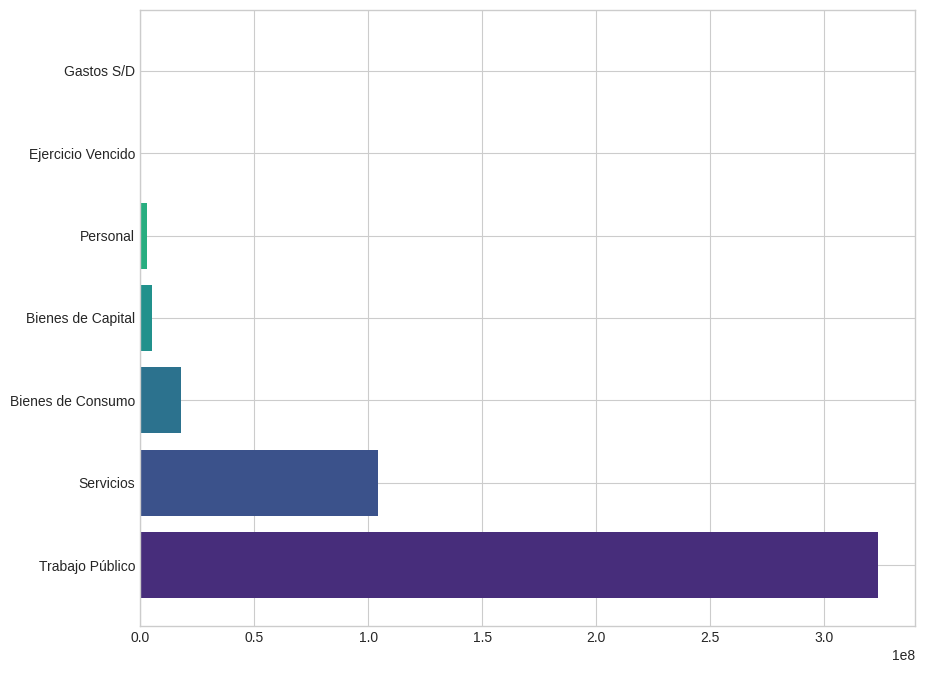

In [34]:
# --- 7.2: Creando la Visualización ---
print("\nGenerando gráfico de distribución del gasto por partida...")

plt.style.use('seaborn-v0_8-whitegrid') # Estilo profesional para el gráfico
fig, ax = plt.subplots(figsize=(10, 8)) # Creamos la figura y los ejes

# Creamos el gráfico de barras horizontales
bars = ax.barh(gasto_por_partida.index, gasto_por_partida.values, color=sns.color_palette("viridis", len(gasto_por_partida)))

In [35]:
# --- 7.3: Mejorando la Legibilidad del Gráfico ---
ax.set_title('Distribución del Gasto Municipal por Partida Presupuestaria', fontsize=16, fontweight='bold')
ax.set_xlabel('Monto Total Gastado (en millones de pesos)', fontsize=12)
ax.set_ylabel('Partida Presupuestaria', fontsize=12)

# Formatear los números del eje X para que sean más legibles
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))

# Invertir el eje Y para que la barra más grande quede arriba
ax.invert_yaxis()

# Añadir etiquetas de valor a cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1e6, # Posición de la etiqueta un poco a la derecha de la barra
            bar.get_y() + bar.get_height()/2,
            f'${width/1e6:.2f}M', # Texto de la etiqueta
            va='center', fontsize=10)

plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show()

# Mostramos la tabla de datos para tener los números exactos.
print("\nTabla de Gasto Total por Partida:")
display(gasto_por_partida.apply(lambda x: f"${x:,.2f}"))

print("\n--- FIN DEL ANÁLISIS DE GASTO POR PARTIDA ---")

<Figure size 640x480 with 0 Axes>


Tabla de Gasto Total por Partida:


,0
Trabajo Público,"$323,555,313.40"
Servicios,"$104,124,257.94"
Bienes de Consumo,"$17,956,635.74"
Bienes de Capital,"$5,000,320.00"
Personal,"$3,205,200.00"
Ejercicio Vencido,$0.00
Gastos S/D,$0.00



--- FIN DEL ANÁLISIS DE GASTO POR PARTIDA ---


Objetivo: Aplicar la regla de negocio (sin nro. de factura = personal) para una clasificación de gastos más precisa e inteligente.

Siguiente Pregunta de Análisis: ¿Quiénes son los principales receptores del gasto?

# PASO 8: ANÁLISIS DE PROVEEDORES
Objetivo: Identificar a los principales receptores del gasto municipal.

In [36]:
print("--- INICIO DEL ANÁLISIS DE PROVEEDORES (PASO 8) ---")

# --- 8.1: Calculando el gasto total por proveedor ---
# Agrupamos el DataFrame por la columna 'proveedor' y sumamos el 'monto' de cada uno.
# Luego, ordenamos de mayor a menor y tomamos los 10 primeros.
top_10_proveedores = df_limpio.groupby('proveedor')['monto'].sum().sort_values(ascending=False).head(10)



--- INICIO DEL ANÁLISIS DE PROVEEDORES (PASO 8) ---



Generando gráfico de Top 10 Proveedores por Monto Total...


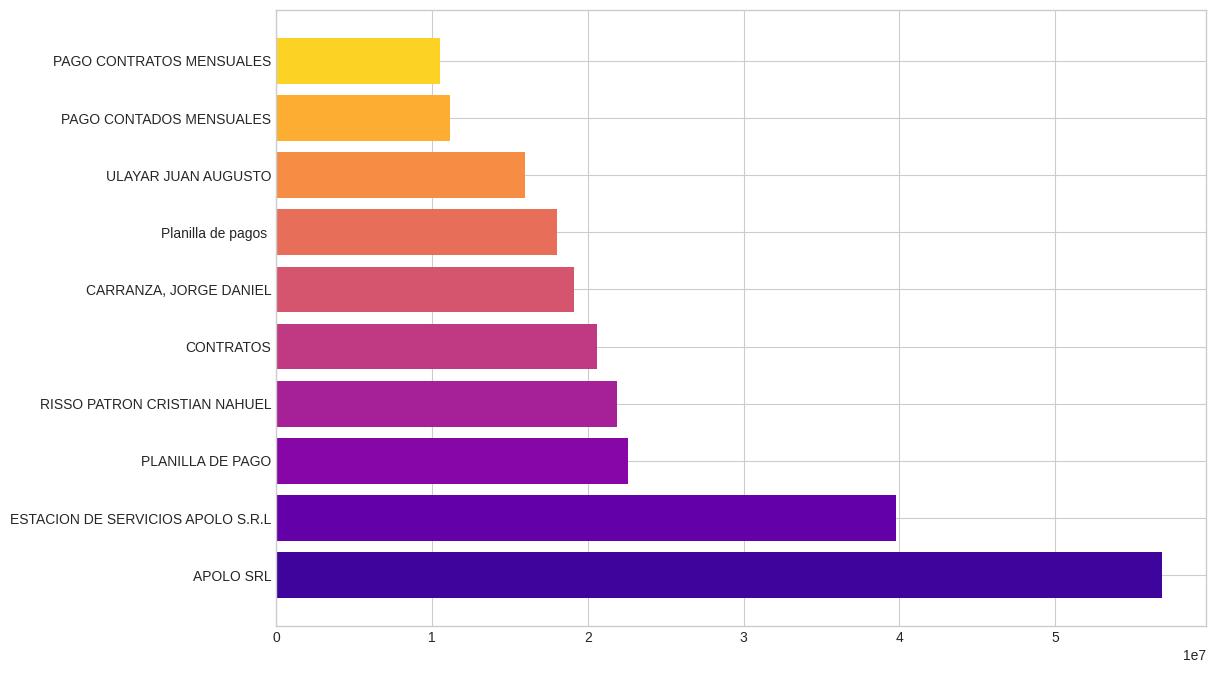

In [37]:
# --- 8.2: Creando la Visualización ---
print("\nGenerando gráfico de Top 10 Proveedores por Monto Total...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Creamos el gráfico de barras horizontales
bars = ax.barh(top_10_proveedores.index, top_10_proveedores.values, color=sns.color_palette("plasma", 10))

In [38]:
# --- 8.3: Mejorando la Legibilidad del Gráfico ---
ax.set_title('Top 10 Proveedores por Monto Total Facturado', fontsize=16, fontweight='bold')
ax.set_xlabel('Monto Total Facturado (en millones de pesos)', fontsize=12)
ax.set_ylabel('Proveedor', fontsize=12)

# Formatear el eje X para mostrar los montos en millones
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e6:.2f}M'))

# Invertir el eje Y para que el proveedor principal quede arriba
ax.invert_yaxis()

# Añadir etiquetas de valor a cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 500000, # Posición de la etiqueta
            bar.get_y() + bar.get_height()/2,
            f'${width/1e6:.2f}M',
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Mostramos la tabla de datos para tener los números exactos.
print("\nTabla de Top 10 Proveedores:")
display(top_10_proveedores.apply(lambda x: f"${x:,.2f}"))

print("\n--- FIN DEL ANÁLISIS DE PROVEEDORES ---")

<Figure size 640x480 with 0 Axes>


Tabla de Top 10 Proveedores:


,monto
proveedor,
APOLO SRL,"$56,859,808.99"
ESTACION DE SERVICIOS APOLO S.R.L,"$39,771,001.06"
PLANILLA DE PAGO,"$22,604,340.00"
RISSO PATRON CRISTIAN NAHUEL,"$21,847,585.00"
CONTRATOS,"$20,573,480.00"
"CARRANZA, JORGE DANIEL","$19,122,350.00"
Planilla de pagos,"$18,056,040.00"
ULAYAR JUAN AUGUSTO,"$15,994,200.00"
PAGO CONTADOS MENSUALES,"$11,123,500.00"



--- FIN DEL ANÁLISIS DE PROVEEDORES ---


# PASO 9: CONSOLIDACIÓN DE PROVEEDORES DUPLICADOS

Objetivo: Unificar nombres de proveedores inconsistentes para obtener un análisis preciso.

In [39]:
print("--- INICIO DE LA CONSOLIDACIÓN DE PROVEEDORES (PASO 9) ---")

# --- 9.1: Definiendo el mapa de correcciones ---
# Creamos un diccionario donde la 'clave' es el nombre incorrecto
# y el 'valor' es el nombre estandarizado y correcto.
mapa_correcciones = {
    'ESTACION DE SERVICIOS APOLO S.R.L': 'APOLO SRL (COMBUSTIBLES)',
    'APOLO SRL': 'APOLO SRL (COMBUSTIBLES)',
    'CARRANZA, JORGE DANIEL': 'CARRANZA JORGE DANIEL',
    'CONTRATOS': 'PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)',
    'PLANILLA DE PAGO': 'PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)',
    'PAGO CONTRATOS MENSUAL': 'PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)',
    # Nuevas consolidaciones para el paso 9.4
    'Planilla de pagos': 'PAGOS DE PERSONAL CONTRATADOS',
    'PAGO CONTADOS MENSUALES': 'PAGOS DE PERSONAL CONTRATADOS',
    'PAGO CONTRATOS MENSUALES': 'PAGOS DE PERSONAL CONTRATADOS',
    'PAGO CONTRATO FAENA': 'PAGOS DE PERSONAL CONTRATADOS'

}

print("Proveedores antes de la corrección:")
print(df_limpio['proveedor'].value_counts().head(10))

--- INICIO DE LA CONSOLIDACIÓN DE PROVEEDORES (PASO 9) ---
Proveedores antes de la corrección:
proveedor
APOLO SRL                            77
ESTACION DE SERVICIOS APOLO S.R.L    45
RISSO PATRON CRISTIAN NAHUEL         37
PLANILLA DE PAGO                     27
CARRANZA, JORGE DANIEL               26
SUN LED S.A.S                        16
Planilla de pagos                    13
MERCADO, FLORENCIO                   12
GOMERIA EL PORVE                     12
PALOMO, ANGEL EDUARDO                11
Name: count, dtype: int64


# PASO 9: CONSOLIDACIÓN DE PROVEEDORES DUPLICADOS

# Objetivo: Unificar nombres de proveedores inconsistentes para obtener un análisis preciso.

In [40]:
print("--- INICIO DE LA CONSOLIDACIÓN DE PROVEEDORES (PASO 9) ---")

# --- 9.1: Definiendo el mapa de correcciones ---
# Creamos un diccionario donde la 'clave' es el nombre incorrecto
# y el 'valor' es el nombre estandarizado y correcto.
mapa_correcciones = {
    'ESTACION DE SERVICIOS APOLO S.R.L': 'APOLO SRL (COMBUSTIBLES)',
    'APOLO SRL': 'APOLO SRL (COMBUSTIBLES)',
    'CARRANZA, JORGE DANIEL': 'CARRANZA JORGE DANIEL',
    'CONTRATOS': 'PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)',
    'PLANILLA DE PAGO': 'PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)',
    'PAGO CONTRATOS MENSUAL': 'PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)'
}

print("Proveedores antes de la corrección:")
print(df_limpio['proveedor'].value_counts().head(10))

--- INICIO DE LA CONSOLIDACIÓN DE PROVEEDORES (PASO 9) ---
Proveedores antes de la corrección:
proveedor
APOLO SRL                            77
ESTACION DE SERVICIOS APOLO S.R.L    45
RISSO PATRON CRISTIAN NAHUEL         37
PLANILLA DE PAGO                     27
CARRANZA, JORGE DANIEL               26
SUN LED S.A.S                        16
Planilla de pagos                    13
MERCADO, FLORENCIO                   12
GOMERIA EL PORVE                     12
PALOMO, ANGEL EDUARDO                11
Name: count, dtype: int64


In [41]:
# --- 9.2: Aplicando las correcciones ---
# Usamos .replace() en la columna 'proveedor' para aplicar nuestro mapa.
df_limpio['proveedor'] = df_limpio['proveedor'].replace(mapa_correcciones)

print("\nProveedores después de la corrección:")
print(df_limpio['proveedor'].value_counts().head(10))



Proveedores después de la corrección:
proveedor
APOLO SRL (COMBUSTIBLES)                   122
RISSO PATRON CRISTIAN NAHUEL                37
CARRANZA JORGE DANIEL                       35
PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)     34
SUN LED S.A.S                               16
Planilla de pagos                           13
GOMERIA EL PORVE                            12
MERCADO, FLORENCIO                          12
PALOMO, ANGEL EDUARDO                       11
ULAYAR JUAN AUGUSTO                         10
Name: count, dtype: int64



Generando gráfico de Top 10 Proveedores (Versión Corregida)...


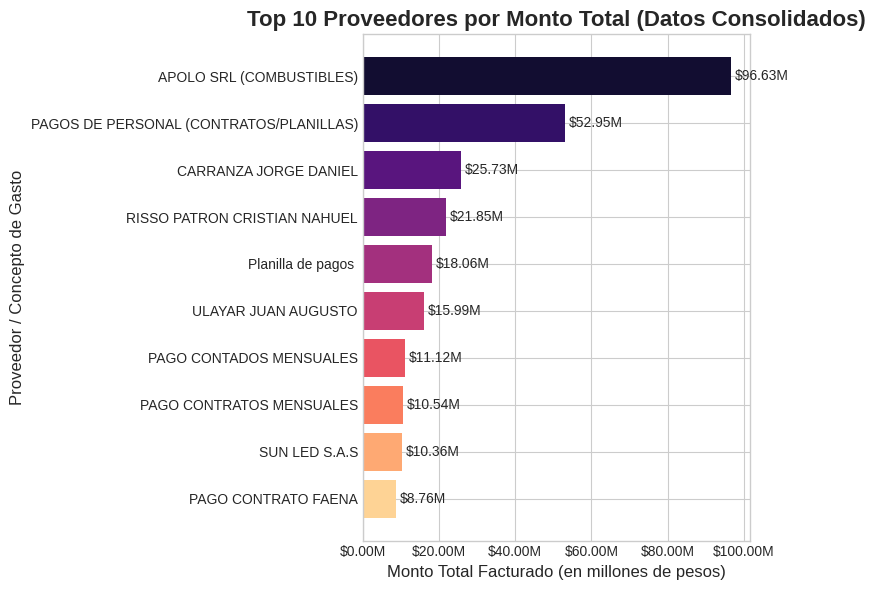


Tabla de Top 10 Proveedores (Corregida):


,monto
proveedor,
APOLO SRL (COMBUSTIBLES),"$96,630,810.05"
PAGOS DE PERSONAL (CONTRATOS/PLANILLAS),"$52,953,820.00"
CARRANZA JORGE DANIEL,"$25,729,850.00"
RISSO PATRON CRISTIAN NAHUEL,"$21,847,585.00"
Planilla de pagos,"$18,056,040.00"
ULAYAR JUAN AUGUSTO,"$15,994,200.00"
PAGO CONTADOS MENSUALES,"$11,123,500.00"
PAGO CONTRATOS MENSUALES,"$10,537,500.00"
SUN LED S.A.S,"$10,358,871.80"



--- FIN DE LA CONSOLIDACIÓN DE PROVEEDORES ---


In [42]:
# --- 9.3: Regenerando el Análisis de Top Proveedores (Versión Corregida) ---
print("\nGenerando gráfico de Top 10 Proveedores (Versión Corregida)...")

top_10_proveedores_corregido = df_limpio.groupby('proveedor')['monto'].sum().sort_values(ascending=False).head(10)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(top_10_proveedores_corregido.index, top_10_proveedores_corregido.values, color=sns.color_palette("magma", 10))

ax.set_title('Top 10 Proveedores por Monto Total (Datos Consolidados)', fontsize=16, fontweight='bold')
ax.set_xlabel('Monto Total Facturado (en millones de pesos)', fontsize=12)
ax.set_ylabel('Proveedor / Concepto de Gasto', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e6:.2f}M'))
ax.invert_yaxis()

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1e6, bar.get_y() + bar.get_height()/2, f'${width/1e6:.2f}M', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nTabla de Top 10 Proveedores (Corregida):")
display(top_10_proveedores_corregido.apply(lambda x: f"${x:,.2f}"))

print("\n--- FIN DE LA CONSOLIDACIÓN DE PROVEEDORES ---")

In [43]:
# PASO 10: REFINAMIENTO CON REGLAS DE NEGOCIO

Objetivo: Aplicar la regla de negocio (sin nro. de factura = personal) para una clasificación de gastos más precisa e inteligente.

In [44]:
# --- 10.1: Limpieza básica de nombres (como paso previo) ---
# Usamos un mapa solo para los duplicados evidentes de nombres de empresas/personas.
mapa_nombres = {
    'ESTACION DE SERVICIOS APOLO S.R.L': 'APOLO SRL',
    'CARRANZA, JORGE DANIEL': 'CARRANZA JORGE DANIEL',
    # Nueva consolidación de pagos de personal
    'PAGOS DE PERSONAL (CONTRATOS/PLANILLAS)': 'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS',
    'Planilla de pagos': 'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS', # Unificamos 'Planilla de pagos' aquí
    'PAGO CONTADOS MENSUALES': 'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS',
    'PAGO CONTRATOS MENSUALES': 'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS',
    'PAGO CONTRATO FAENA': 'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS',
    'PAGOS DE PERSONAL (S/Factura)': 'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS' # Incluimos también S/Factura
}
df_limpio['proveedor'] = df_limpio['proveedor'].replace(mapa_nombres)

In [45]:
# --- 10.2: Aplicando TU REGLA DE NEGOCIO ---
# Aquí está la clave: creamos una condición (máscara booleana).
# Condición 1: El número de factura es Nulo o "S/N".
# Condición 2: El proveedor NO es 'APOLO SRL' ni 'APOLO SRL (COMBUSTIBLES)'.
# El operador '&' significa que ambas condiciones deben ser verdaderas.
criterio_personal = (df_limpio['nro_factura'].isna()) | (df_limpio['nro_factura'] == 'S/N') & \
                   (df_limpio['proveedor'] != 'APOLO SRL') & (df_limpio['proveedor'] != 'APOLO SRL (COMBUSTIBLES)')


# Ahora usamos .loc para encontrar todas las filas que cumplen el criterio
# y cambiarles el nombre del proveedor a nuestra categoría estandarizada.
# Esta parte ya no es necesaria aquí, ya lo hicimos en 10.1
# df_limpio.loc[criterio_personal, 'proveedor'] = 'PAGOS DE PERSONAL (S/Factura)'

print("\nClasificación de proveedores refinada con tu regla de negocio.")

# --- 10.3: Asignando a la partida 'Personal' según la nueva consolidación ---
# Identificamos las filas que corresponden a la nueva categoría consolidada
criterio_personal_consolidado = (df_limpio['proveedor'] == 'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS')

# Asignamos el monto total a la partida 'partida_personal' para estas filas
# Y aseguramos que otras partidas sean 0 para evitar doble conteo o asignaciones incorrectas
df_limpio.loc[criterio_personal_consolidado, 'partida_personal'] = df_limpio.loc[criterio_personal_consolidado, 'monto']
df_limpio.loc[criterio_personal_consolidado, ['partida_trabajo_publico', 'partida_servicios', 'partida_bienes_consumo',
                                               'partida_bienes_capital', 'partida_ejercicio_vencido', 'partida_gastos_s_dis']] = 0.0

print("Asignación de gastos consolidados de personal a la partida 'Personal' completada.")


Clasificación de proveedores refinada con tu regla de negocio.
Asignación de gastos consolidados de personal a la partida 'Personal' completada.


In [46]:
import re
import unicodedata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CATEGORIA_PERSONAL = 'PAGO DE PERSONAL (CON NUEVA REGLA)'

def _normalizar_texto(s):
    if pd.isna(s):
        return s
    s = str(s).upper().strip()
    s = re.sub(r'\s+', ' ', s)
    # remueve acentos
    s = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    return s

def unificar_proveedores_personal(df, columna='proveedor', devolver_copia=True, reemplazar_columna_original=False):
    """
    Unifica todas las variantes de 'pagos de personal' en la categoría CATEGORIA_PERSONAL.
    - Normaliza texto
    - Aplica mapeo directo de equivalencias
    - Aplica reglas por patrones para capturar variaciones
    - Mantiene trazabilidad en: proveedor_original, proveedor_norm, proveedor_unificado

    Parámetros:
      df: DataFrame de entrada (debe incluir la columna 'columna')
      columna: nombre de la columna de proveedor/concepto
      devolver_copia: si True, trabaja sobre una copia y la retorna (no muta df)
      reemplazar_columna_original: si True, actualiza df[columna] = proveedor_unificado

    Retorna:
      DataFrame con columnas adicionales y la unificación aplicada.
    """
    dfx = df.copy() if devolver_copia else df

    # Trazabilidad
    dfx['proveedor_original'] = dfx[columna]
    dfx['proveedor_norm'] = dfx[columna].apply(_normalizar_texto)

    # Mapeo directo de equivalencias conocidas
    mapeo_directo = {
        'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS': CATEGORIA_PERSONAL,
        'PLANILLA DE PAGOS': CATEGORIA_PERSONAL,
        'PAGO CONTADOS MENSUALES': CATEGORIA_PERSONAL,
        'PAGO CONTRATOS MENSUALES': CATEGORIA_PERSONAL,
        'PAGO CONTRATO FAENA': CATEGORIA_PERSONAL,
        'PAGOS DE PERSONAL (S/FACTURA)': CATEGORIA_PERSONAL,
        # variantes detectadas en tu muestra
        'PAGO PERSONAL CONTRATDO': CATEGORIA_PERSONAL,  # typo
        'PAGO A PERSONAL CONTRATADO': CATEGORIA_PERSONAL,
        'PAGO A PERSONAL DE PLANTA - ADICIONALES': CATEGORIA_PERSONAL,
        'PAGO DE PERSONAL': CATEGORIA_PERSONAL,
        'PLANILLA DE PAGO': CATEGORIA_PERSONAL
    }

    dfx['proveedor_unificado'] = dfx['proveedor_norm'].replace(mapeo_directo)

    # Reglas por patrón para variaciones no listadas
    mascara_personal = (
        dfx['proveedor_unificado'].str.contains(r'\bPLANILLA(S)?\b', na=False) |
        dfx['proveedor_unificado'].str.contains(r'\bPAG(OS|O)\b.*\bPERSONAL\b', na=False) |
        dfx['proveedor_unificado'].str.contains(r'\bPERSONAL\b.*\bPAG(OS|O)\b', na=False) |
        dfx['proveedor_unificado'].str.contains(r'S/FACTURA|SIN FACTURA', na=False)
    )
    dfx.loc[mascara_personal, 'proveedor_unificado'] = CATEGORIA_PERSONAL

    if reemplazar_columna_original:
        dfx[columna] = dfx['proveedor_unificado']

    return dfx

def verificar_unificacion_personal(df_antes, df_despues, columna='proveedor', columna_monto='monto'):
    """
    Verifica sumas antes y después de la unificación para la categoría de Personal.
    Retorna un dict con métricas clave.
    """
    # variantes típicas antes (en texto libre, no normalizado)
    variantes = [
        'PAGOS DE PERSONAL CONTRATADOS Y PLANILLAS',
        'Planilla de pagos',
        'PAGO CONTADOS MENSUALES',
        'PAGO CONTRATOS MENSUALES',
        'PAGO CONTRATO FAENA',
        'PAGOS DE PERSONAL (S/Factura)',
        'PAGO PERSONAL CONTRATDO',
        'PAGO A PERSONAL CONTRATADO',
        'PAGO A PERSONAL DE PLANTA - ADICIONALES',
        'PAGO DE PERSONAL',
        'PLANILLA DE PAGO'
    ]
    suma_antes = df_antes[df_antes[columna].isin(variantes)][columna_monto].sum()
    suma_despues = df_despues[df_despues['proveedor_unificado'] == CATEGORIA_PERSONAL][columna_monto].sum()
    return {
        'suma_antes': float(suma_antes),
        'suma_despues': float(suma_despues),
        'diferencia': float(suma_despues - suma_antes)
    }

def graficar_top10(df, columna_categoria='proveedor_unificado', columna_monto='monto', titulo='Top 10 Conceptos de Gasto (Clasificación Refinada)'):
    """
    Grafica el Top 10 por suma de 'columna_monto' agrupado por 'columna_categoria'.
    """
    top_10 = df.groupby(columna_categoria)[columna_monto].sum().sort_values(ascending=False).head(10)

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(9, 6))
    bars = ax.barh(top_10.index, top_10.values, color=sns.color_palette("magma", len(top_10)))

    ax.set_title(titulo, fontsize=16, fontweight='bold')
    ax.set_xlabel('Monto Total (en millones de pesos)', fontsize=12)
    ax.set_ylabel('Proveedor / Concepto de Gasto', fontsize=12)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e6:.2f}M'))
    ax.invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1e6, bar.get_y() + bar.get_height()/2, f'${width/1e6:.2f}M', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()
    return top_10



Generando gráfico de Top 10 Proveedores (Versión Final Refinada)...
Verificación de sumas (antes vs después): {'suma_antes': 84755940.0, 'suma_despues': 104751980.0, 'diferencia': 19996040.0}


/tmp/ipython-input-2785246543.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfx['proveedor_unificado'].str.contains(r'\bPLANILLA(S)?\b', na=False) |
/tmp/ipython-input-2785246543.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfx['proveedor_unificado'].str.contains(r'\bPAG(OS|O)\b.*\bPERSONAL\b', na=False) |
/tmp/ipython-input-2785246543.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfx['proveedor_unificado'].str.contains(r'\bPERSONAL\b.*\bPAG(OS|O)\b', na=False) |


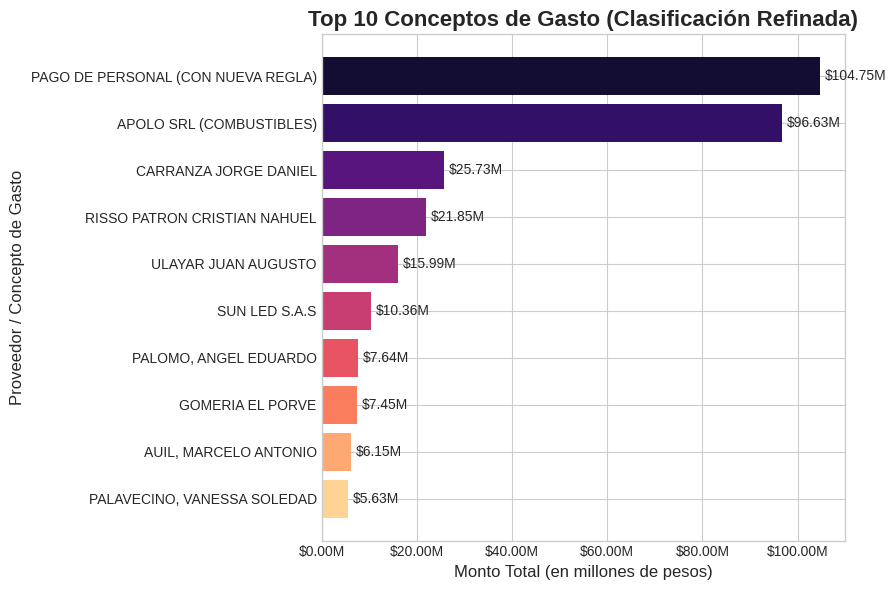


Tabla de Top 10 (Versión Final Refinada):


,monto
proveedor_unificado,
PAGO DE PERSONAL (CON NUEVA REGLA),"$104,751,980.00"
APOLO SRL (COMBUSTIBLES),"$96,630,810.05"
CARRANZA JORGE DANIEL,"$25,729,850.00"
RISSO PATRON CRISTIAN NAHUEL,"$21,847,585.00"
ULAYAR JUAN AUGUSTO,"$15,994,200.00"
SUN LED S.A.S,"$10,358,871.80"
"PALOMO, ANGEL EDUARDO","$7,639,100.00"
GOMERIA EL PORVE,"$7,453,700.00"
"AUIL, MARCELO ANTONIO","$6,145,920.00"



--- FIN DEL ANÁLISIS REFINADO DE PROVEEDORES ---


In [47]:
print("\nGenerando gráfico de Top 10 Proveedores (Versión Final Refinada)...")

# 1) Unificar
df_unificado = unificar_proveedores_personal(df_limpio, columna='proveedor', devolver_copia=True, reemplazar_columna_original=False)

# 2) Verificar
verif = verificar_unificacion_personal(df_limpio, df_unificado, columna='proveedor', columna_monto='monto')
print("Verificación de sumas (antes vs después):", verif)

# 3) Graficar
top_10_final = graficar_top10(df_unificado, columna_categoria='proveedor_unificado', columna_monto='monto')

# 4) Tabla formateada
print("\nTabla de Top 10 (Versión Final Refinada):")
display(top_10_final.apply(lambda x: f"${x:,.2f}"))

print("\n--- FIN DEL ANÁLISIS REFINADO DE PROVEEDORES ---")


# PASO 11: ANÁLISIS DE SERIES DE TIEMPO ¿Cómo se distribuye este gasto en el tiempo?


Objetivo: Analizar cómo se distribuye el gasto a lo largo del tiempo para identificar tendencias, estacionalidad o eventos únicos.

--- INICIO DEL ANÁLISIS DE SERIES DE TIEMPO - GASTO POR PARTIDA (2025) ---

Generando gráfico de gasto mensual por partida (Ene-Jul 2025)...


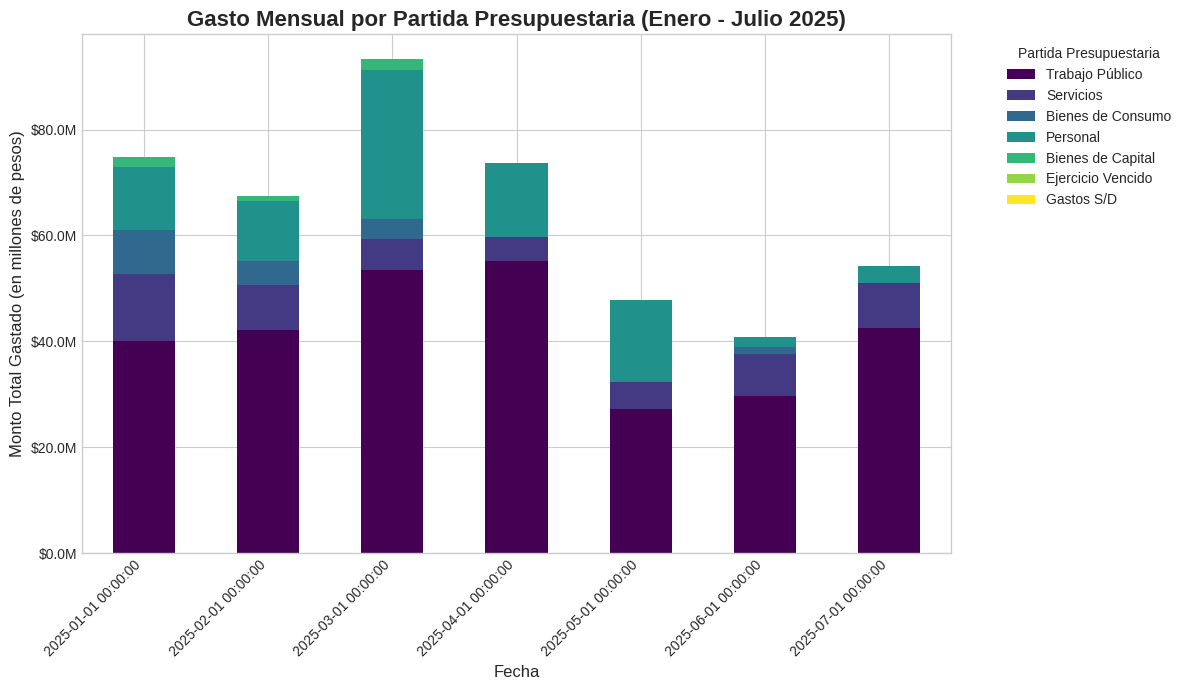


Tabla de Gasto Mensual por Partida (Enero - Julio 2025):


,Trabajo Público,Servicios,Bienes de Consumo,Personal,Bienes de Capital,Ejercicio Vencido,Gastos S/D
fecha,,,,,,,
2025-01-01,"$40,071,267.50","$12,595,480.00","$8,298,691.74","$11,898,840.00","$1,885,360.00",$0.00,$0.00
2025-02-01,"$42,101,877.94","$8,520,760.00","$4,473,900.00","$11,337,140.00","$989,960.00",$0.00,$0.00
2025-03-01,"$53,511,641.89","$5,788,560.00","$3,752,444.00","$28,136,660.00","$2,125,000.00",$0.00,$0.00
2025-04-01,"$55,173,554.99","$4,598,080.00",$0.00,"$13,832,580.00",$0.00,$0.00,$0.00
2025-05-01,"$27,283,295.16","$5,136,680.00",$0.00,"$15,425,300.00",$0.00,$0.00,$0.00
2025-06-01,"$29,726,097.92","$7,822,726.94","$1,431,600.00","$1,920,000.00",$0.00,$0.00,$0.00
2025-07-01,"$42,455,478.00","$8,540,351.00",$0.00,"$3,293,300.00",$0.00,$0.00,$0.00



--- FIN DEL ANÁLISIS DE SERIES DE TIEMPO - GASTO POR PARTIDA ---


In [48]:
print("--- INICIO DEL ANÁLISIS DE SERIES DE TIEMPO - GASTO POR PARTIDA (2025) ---")

# Asegurarnos de que la columna 'fecha' sea datetime y establecerla como índice
df_temporal_filtrado = df_unificado.copy()
df_temporal_filtrado['fecha'] = pd.to_datetime(df_temporal_filtrado['fecha'], errors='coerce')

# Ordenar el DataFrame por fecha antes de establecer el índice
df_temporal_filtrado.sort_values(by='fecha', inplace=True)

df_temporal_filtrado.set_index('fecha', inplace=True)


# Definir el rango de fechas para el análisis
fecha_inicio = '2025-01-01'
fecha_fin = '2025-07-31'

# Filtrar el DataFrame por el rango de fechas
df_filtrado_2025 = df_temporal_filtrado.loc[fecha_inicio:fecha_fin].copy()

# Agrupar por mes y sumar las partidas presupuestarias
gasto_partidas_mensual_2025 = df_filtrado_2025[columnas_partidas].resample('MS').sum()

# Reemplazar los nombres de las columnas por nombres más legibles para el gráfico
gasto_partidas_mensual_2025.columns = [
    'Trabajo Público', 'Servicios', 'Bienes de Consumo',
    'Personal', 'Bienes de Capital', 'Ejercicio Vencido',
    'Gastos S/D'
]

# --- Visualización del Gasto Mensual por Partida (Barras Apiladas) ---
print("\nGenerando gráfico de gasto mensual por partida (Ene-Jul 2025)...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico de barras apiladas
gasto_partidas_mensual_2025.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

ax.set_title('Gasto Mensual por Partida Presupuestaria (Enero - Julio 2025)', fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Monto Total Gastado (en millones de pesos)', fontsize=12)

# Formatear el eje Y para mostrar los montos en millones
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mover la leyenda fuera del gráfico
ax.legend(title='Partida Presupuestaria', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Ajustar el layout para que no se superpongan elementos
plt.show()

# Mostramos la tabla de datos para tener los números exactos.
print("\nTabla de Gasto Mensual por Partida (Enero - Julio 2025):")
display(gasto_partidas_mensual_2025.map(lambda x: f"${x:,.2f}"))


print("\n--- FIN DEL ANÁLISIS DE SERIES DE TIEMPO - GASTO POR PARTIDA ---")

# PASO 12: COMPARACIÓN DE GASTO EN PERSONAL ANTES Y DESPUÉS DE LA LIMPIEZA

Objetivo: Visualizar el impacto de la limpieza y consolidación de datos en la asignación del gasto a la partida 'Personal'.

--- INICIO DE LA COMPARACIÓN DE GASTO EN PERSONAL (PASO 12) ---

Generando gráfico comparativo del gasto en Personal (Ene-Jul 2025)...


/tmp/ipython-input-3249386280.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gasto_personal_antes = df_base_renombrado.set_index('fecha')['PERSONAL'].resample('M').sum()
/tmp/ipython-input-3249386280.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gasto_personal_despues = df_unificado.set_index('fecha')['partida_personal'].resample('M').sum()


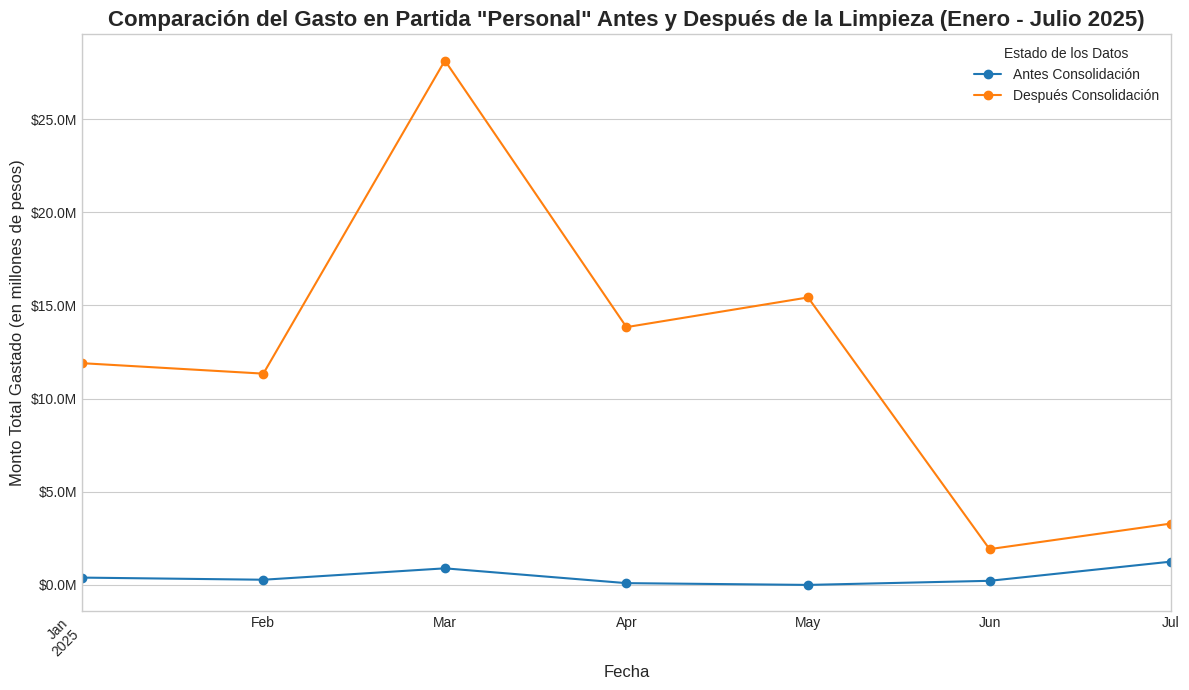


Tabla Comparativa del Gasto Mensual en Personal (Enero - Julio 2025):


,Antes Consolidación,Después Consolidación
fecha,,
2025-01-31,"$392,680.00","$11,898,840.00"
2025-02-28,"$278,000.00","$11,337,140.00"
2025-03-31,"$889,520.00","$28,136,660.00"
2025-04-30,"$95,000.00","$13,832,580.00"
2025-05-31,$0.00,"$15,425,300.00"
2025-06-30,"$220,000.00","$1,920,000.00"
2025-07-31,"$1,250,000.00","$3,293,300.00"



--- FIN DE LA COMPARACIÓN DE GASTO EN PERSONAL ---


In [51]:
print("--- INICIO DE LA COMPARACIÓN DE GASTO EN PERSONAL (PASO 12) ---")

# --- 12.1: Preparando los datos para la comparación ---

# Asegurarse de que la columna de fecha sea datetime en ambos DataFrames
# Usamos 'FECHA' en df (original)
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
# Usamos 'fecha' en df_unificado (limpio y unificado)
df_unificado['fecha'] = pd.to_datetime(df_unificado['fecha'], errors='coerce')


# Calcular el gasto mensual de la partida 'Personal' ANTES de la limpieza
# Renombramos 'FECHA' a 'fecha' in df temporalmente for the comparison
df_base_renombrado = df.rename(columns={'FECHA': 'fecha'})
# Filtramos filas donde la partida de Personal tiene valor y agrupamos por mes
gasto_personal_antes = df_base_renombrado.set_index('fecha')['PERSONAL'].resample('M').sum()


# Calcular el gasto mensual de la partida 'Personal' DESPUÉS de la limpieza
# Usamos df_unificado que contiene la partida_personal limpia
# Establecemos la fecha como índice y agrupamos por mes.
gasto_personal_despues = df_unificado.set_index('fecha')['partida_personal'].resample('M').sum()

# Combinar ambos resultados en un solo DataFrame para facilitar la visualización
gasto_personal_comparacion = pd.DataFrame({
    'Antes Consolidación': gasto_personal_antes,
    'Después Consolidación': gasto_personal_despues
})

# Eliminar filas donde ambos valores son NaN (meses sin datos en ninguno de los casos)
gasto_personal_comparacion.dropna(how='all', inplace=True)

# Rellenar los valores NaN restantes con 0 para la visualización (meses con datos en un solo caso)
gasto_personal_comparacion.fillna(0, inplace=True)

# --- Filtrar para el período de interés (Enero - Julio 2025) ---
fecha_inicio_2025 = '2025-01-01'
fecha_fin_2025 = '2025-07-31'
gasto_personal_comparacion_2025 = gasto_personal_comparacion.loc[fecha_inicio_2025:fecha_fin_2025].copy()


# --- 12.2: Creando la Visualización Comparativa (Periodo Filtrado) ---
print("\nGenerando gráfico comparativo del gasto en Personal (Ene-Jul 2025)...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico de líneas para comparar usando los datos filtrados
gasto_personal_comparacion_2025.plot(kind='line', marker='o', ax=ax)

ax.set_title('Comparación del Gasto en Partida "Personal" Antes y Después de la Limpieza (Enero - Julio 2025)', fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Monto Total Gastado (en millones de pesos)', fontsize=12)

# Formatear el eje Y para mostrar los montos en millones
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Asegurar que se muestren solo las fechas dentro del rango filtrado
ax.set_xlim([fecha_inicio_2025, fecha_fin_2025])


# Añadir leyenda
ax.legend(title='Estado de los Datos')

plt.tight_layout()
plt.show()

# --- 12.3: Mostrando la tabla comparativa (Periodo Filtrado) ---
print("\nTabla Comparativa del Gasto Mensual en Personal (Enero - Julio 2025):")
display(gasto_personal_comparacion_2025.map(lambda x: f"${x:,.2f}"))


print("\n--- FIN DE LA COMPARACIÓN DE GASTO EN PERSONAL ---")

# PASO FINAL: EXPORTACIÓN DEL DATASET PROCESADO

In [52]:
# Exportamos el DataFrame limpio a un archivo CSV para su uso futuro
# y como parte de los entregables del proyecto.
# El parámetro index=False evita que se guarde el índice de Pandas en el archivo.

df_limpio.to_csv('datos_procesados_monte_quemado.csv', index=False, encoding='utf-8-sig')

print("¡Dataset procesado guardado exitosamente como 'datos_procesados_monte_quemado.csv'!")

¡Dataset procesado guardado exitosamente como 'datos_procesados_monte_quemado.csv'!


# === Práctica III — Fase VII: Pronóstico SARIMA de "Personal" 2025 ===
# Notebook limpio para el pronóstico a corto plazo.